# PART ONE

# Machine Learning with Scikit Learn

## What is Machine Learning?
- Machine is the process whereby: 
    - Computers are given the ability to learn to make decisions from data
    - Without being explicitly programmed

## Unsupervised Learning
- Uncovering hidden patterns from unlabeled data
- Example:
    - Grouping customers into distinct categories (clustering)

![Screen Shot 2023-08-21 at 8.29.05 PM](Screen%20Shot%202023-08-21%20at%208.29.05%20PM.png)
## Supervised Learning

- The predicted values are known
- Aim: Predict the target values of unseen data, given the features

![Screen Shot 2023-08-21 at 8.32.00 PM](Screen%20Shot%202023-08-21%20at%208.32.00%20PM.png)

## Types of Supervised Learning 
- Classification: Target variable consists of categories
- Regression: Target variable is continuous

## Naming Conventions
- Feature = predictor variable = independent variable
- Target variable = response variable = dependent variable

### Before you use Supervised Learning

- Requirements
    - No missing values
    - Data in numeric format
    - Data stored in pandas DataFrame or Numpy array 
- Perform Exploratory Data Analysis

In [ ]:
## Scikit Learn Syntax

from sklearn.module import Model
model = Model()
model.fit(X,Y)
predictions = model.predict(X_new)
print(predictions)

# The Classification Challange

## Clasifying labels of Unseen data
1. Build a model
2. Model learns from the labeled data we pass to it
3. Pass unlabeled data to the model as input
4. Model predicts the labels of the unseen data

- labeled data = training data

## K-Nearest Neighbors

- Predict the label of a data point by:
    - Looking at the `k` closest labeled data points
    - Taking a majority vote

## K-Nearest Neighbors 
![Screen Shot 2023-08-21 at 8.44.36 PM](Screen%20Shot%202023-08-21%20at%208.44.36%20PM.png)

## K-Nearest Neighbors
![Screen Shot 2023-08-21 at 8.45.23 PM](Screen%20Shot%202023-08-21%20at%208.45.23%20PM.png)

## K-Nearest Neighbors
![Screen Shot 2023-08-21 at 8.46.28 PM](Screen%20Shot%202023-08-21%20at%208.46.28%20PM.png)

## KNN Intuition
![Screen Shot 2023-08-21 at 8.47.33 PM](Screen%20Shot%202023-08-21%20at%208.47.33%20PM.png)

## KNN Intuition
![Screen Shot 2023-08-21 at 8.47.56 PM](Screen%20Shot%202023-08-21%20at%208.47.56%20PM.png)

In [3]:
# Using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier
X = telecom[['total_day_charge','total_eve_charge']].values
y = telecom['churn'].values
print(X.shape, y.shape)
knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(X,y)

# Predicting on unlabeled data

X_new = np.array([[56.8,17.5],
                 [24.4,24.1],
                 [50.1,10.9]])
print(X_new)
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))  

(3333, 2) (3333,)
[[56.8 17.5]
 [24.4 24.1]
 [50.1 10.9]]
Predictions: [1 0 0]


# k-Nearest Neighbors: Fit
In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

numpy has also been preloaded for you as np.

## Instructions

- Import KNeighborsClassifier from sklearn.neighbors.
- Create an array called X containing values from the "account_length" and "customer_service_calls" columns, and an array called y for the values of the "churn" column.
- Instantiate a KNeighborsClassifier called knn with 6 neighbors.
- Fit the classifier to the data using the .fit() method.

In [4]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = telecom["churn"].values
X = telecom[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

# k-Nearest Neighbors: Predict
Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
## Instructions

- Create y_pred by predicting the target values of the unseen features X_new.
- Print the predicted labels for the set of predictions.

In [5]:
# Predict the labels for the X_new
X_new = np.array([[30.0, 17.5], [107.0, 24.1], [213.0, 10.9]])
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


# Measuring Accuracy
## Measuring model performance
- In classication, accuracy is a commonly used metric
- Accuracy

$$
\frac{\text{correct predictions}}{\text{Total predictions}}
$$

## Measuring model performance
- How do we measure accuracy?
- Could compute accuracy on the data used to fit the classier
- NOT indicative of ability to generalize


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.854


# Model Complexity
- Large k = less complex model = can cause underfitting
- Smaller k = more complex model = can lead to overfitting 

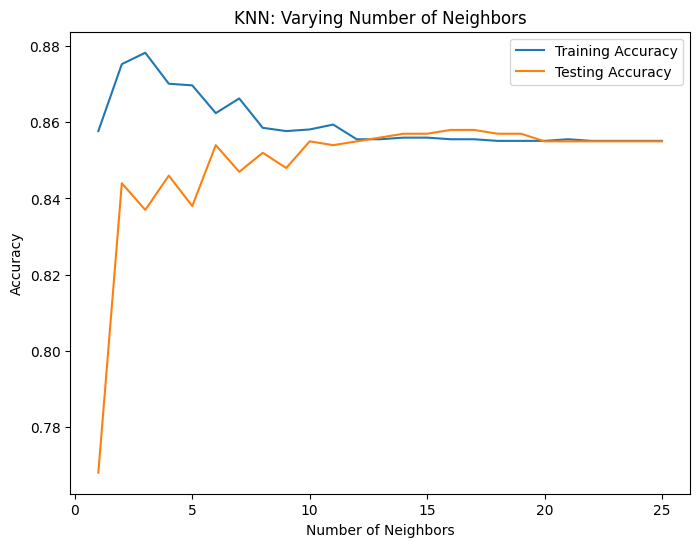

In [7]:
# Model complexity and over/under fitting 
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
        
#  Plotting our results
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# Train/test split + computing accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.

## Instructions

- Import train_test_split from sklearn.model_selection.
- Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
- Fit the knn model to the training data.
- Compute and print the model's accuracy for the test data.

In [8]:
# Import the module
from sklearn.model_selection import train_test_split

X = telecom.drop("churn", axis=1).values
y = telecom["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


# Overfitting and underfitting

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

## Instructions

- Create neighbors as a numpy array of values from 1 up to and including 12.
- Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.
- Fit the model to the training data.
- Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.

In [9]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


# Visualizing model complexity

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

## Instructions

- Add a title "KNN: Varying Number of Neighbors".
- Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
- Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
- Display the plot.

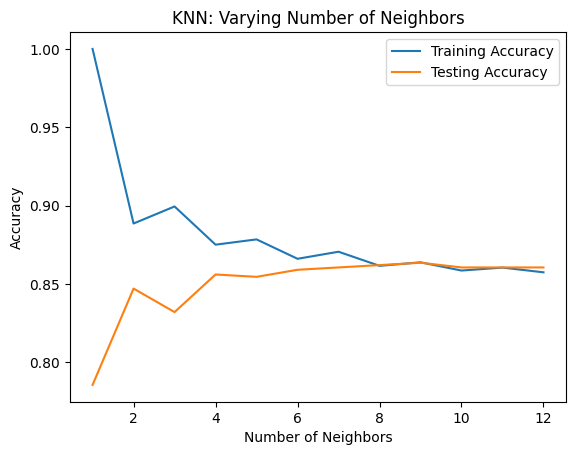

In [10]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# Introduction to Regression



   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(768,) (768,)
(768, 1)


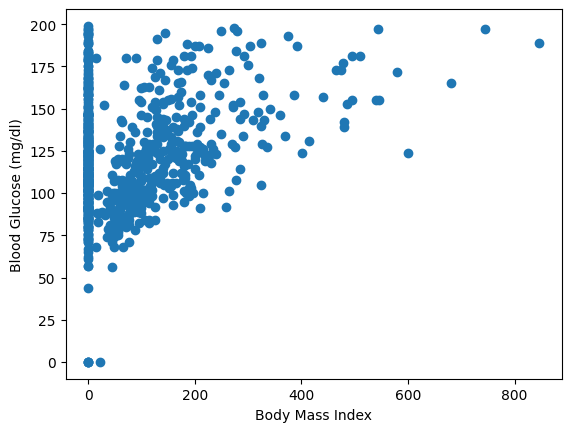

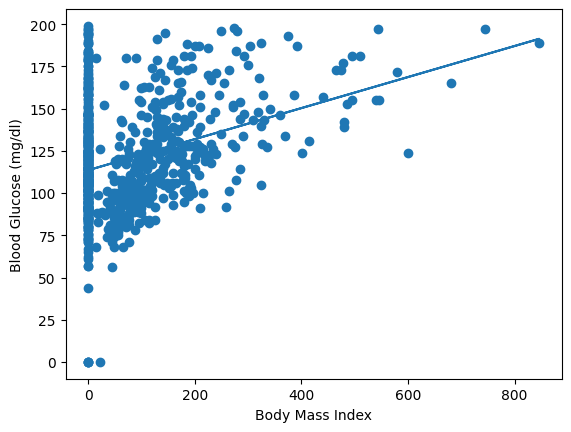

In [11]:
# Predicting Blood Glucose Level

import pandas as pd
diabetes_df = pd.read_csv('datasets/diabetes_clean.csv')
print(diabetes_df.head())
# Creting feature and target arrays
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))
# Making Predictions from a single feature
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
# Plotting glucose vs body mass index
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

# Fitting a regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

# Creating features
In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

|  |tv  |radio  |social_media  |sales|
|-- |-- |-- |-- |--|
|1  |13000.0  |9237.76  |2409.57 |46677.90|
|2  |41000.0  |15886.45 |2913.41  |150177.83|

You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

## Instructions

- Create X, an array of the values from the sales_df DataFrame's "radio" column.
- Create y, an array of the values from the sales_df DataFrame's "sales" column.
- Reshape X into a two-dimensional NumPy array.
- Print the shape of X and y.

In [12]:
import numpy as np

# Create X from the radio column's values
X = advertising['radio'].values

# Create y from the sales column's values
y = advertising['sales'].values

# Reshape X
X = X.reshape(-1,1)
# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


# Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

X and y have been preloaded for you as follows:

y = sales_df["sales"].values  
X = sales_df["radio"].values.reshape(-1, 1)  

## Instructions

- Import LinearRegression.
- Instantiate a linear regression model.
- Predict sales values using X, storing as predictions.

In [13]:
y = advertising["sales"].values
X = advertising["radio"].values.reshape(-1, 1)
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


# Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

## Instructions

- Import matplotlib.pyplot as plt.
- Create a scatter plot visualizing y against X, with observations in blue.
- Draw a red line plot displaying the predictions against X.
- Display the plot.

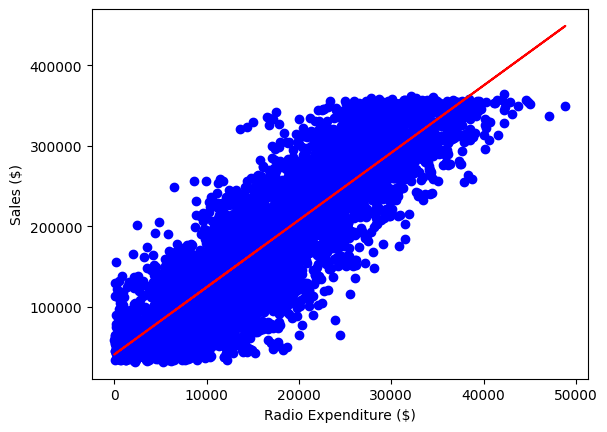

In [14]:
y = advertising["sales"].values
X = advertising["radio"].values.reshape(-1, 1)

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

# The basics of Linear Regression

## Regression mechanics 
- $y = ax + b$
    - Simple linear regression uses one feature 
        - y = target 
        - x = single feature 
        - a,b = parameters/coecients of the model -slope, intercept 
- How do we choose a and b? 
    - Define an error function for any given line.
    - Choose the line that minimizes the error function 
- Error function = loss function = costfunction

## Linear regression in higher dimensions 
$$y = a_1x_1 + a_2x_2 + b$$

- To fit a linear regression model here: 
    - Need to specify 3 variables: $a_1, a_2, b$ 
- In higher dimensions:
    - Known as multiple regression 
    - Must specify coefficients for each feature and the variable, b
$$ 
y = a_1x_1+a_2x_2+a_3x_3+...+a_nx_n+b
$$
- scikit-learn works exactly the same way:
    - Pass two arrays: features and target

## R-squared
- $R^2$:quanties the variance in target values explained by the features 
    - Values range from 0 to 1 

## Mean squared error and root mean squared error
$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i − \hat{y})^2$  
- MSE is measured in target units, squared 
$RMSE = \sqrt{MSE}$  
Measure RMSE in the same units at the target variable 

In [15]:
# Linear regression using all features 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

# R-squared in scikit-learn
reg_all.score(X_test, y_test)

# RMSE in scikit-learn 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

45879.42086239429

# Fit and predict for regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:

|  |tv  |radio  |social_media  |sales|
|-- |-- |-- |-- |--|
|1  |13000.0  |9237.76  |2409.57 |46677.90|
|2  |41000.0  |15886.45 |2913.41  |150177.83|

You will then use this model to predict sales based on the values of the test features.

LinearRegression and train_test_split have been preloaded for you from their respective modules.

## Instructions

- Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
- Instantiate a linear regression model.
- Fit the model to the training data.
- Create y_pred, making predictions for sales using the test features.

In [21]:
# Create X and y arrays
X = advertising.drop("sales", axis=1).values
y = advertising["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [ 69614.40196636 104976.82354797], Actual Values: [55261.28 67574.9 ]


# Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

## Instructions

- Import mean_squared_error.
- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
- Calculate the model's root mean squared error using y_test and y_pred.
- Print r_squared and rmse.

In [16]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.7609020445216754
RMSE: 45879.42086239429


# Cross Validation
## Cross-validation motivation 
- Model performance is dependent on the way we split up the data 
- Not representative of the model's ability to generalize to unseen data 
- Solution: Cross-validation!

## Cross-validation and model performance 
- 5 folds = 5-fold CV 
- 10 folds = 10-fold CV
- k folds = k-fold CV 
- More folds = More computationally expensive

In [17]:
# Cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

# Evaluating cross-validation peformance 
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.75188205 0.7659624  0.75262578 0.76414482 0.72551151 0.76308277]
0.753868221741572 0.013822547325563456
[0.72880783 0.7657352 ]


# Cross-validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.

## Instructions

- Import KFold and cross_val_score.
- Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
- Perform cross-validation using reg on X and y, passing kf to cv.
- Print the cv_scores.

In [18]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.74470218 0.7724344  0.76841901 0.74186012 0.75174985 0.7444348 ]


# Analyzing cross-validation metrics
Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.

numpy has been imported for you as np.

## Instructions

- Calculate and print the mean of the results.
- Calculate and print the standard deviation of cv_results.
- Display the 95% confidence interval for your results using np.quantile().

In [19]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.753868221741572
0.013822547325563456
[0.72880783 0.7657352 ]


# Regularized regression

## Why regularize?
- Recall: Linear regression minimizes a loss function 
- It chooses a coefficient, a, for each feature variable, plus b 
- Large coefficients can lead to overfitting
- Regularization: Penalize large coefficients

## Ridge regression 
- Loss function = OLS loss functio + 
$$
\alpha * \sum_{i=1}^{n} \alpha_i ^2
$$
- Ridge penalizes large positive or negative coefficients 
- α: parameter we need to choose 
- Picking α is similar to picking `k` in KNN 
- Hyperparameter: variable used to optimize model parameters 
- α controls model complexity 
    - α = 0 = OLS (Canleadtoovering)
    - Very high α: Can lead to under fitting

## Lasso regression 
- Loss function = OLS loss functio + 
$$
\alpha * \sum_{i=1}^{n} |\alpha_i|
$$

### Lasso regression for feature selection 
- Lasso can select important features of a dataset 
- Shrinks the coefficients of less important features to zero 
- Features not shrunk to zero are selected by lasso



[0.7609020445216718]
[0.7609020445216718, 0.7609020445216387]
[0.7609020445216718, 0.7609020445216387, 0.7609020445213077]
[0.7609020445216718, 0.7609020445216387, 0.7609020445213077, 0.7609020445179987]
[0.7609020445216718, 0.7609020445216387, 0.7609020445213077, 0.7609020445179987, 0.7609020444849083]
[0.7609020445215352]
[0.7609020445215352, 0.7609020445076518]
[0.7609020445215352, 0.7609020445076518, 0.7609020443814385]
[0.7609020445215352, 0.7609020445076518, 0.7609020443814385, 0.7609020442412013]
[0.7609020445215352, 0.7609020445076518, 0.7609020443814385, 0.7609020442412013, 0.7609020438204882]


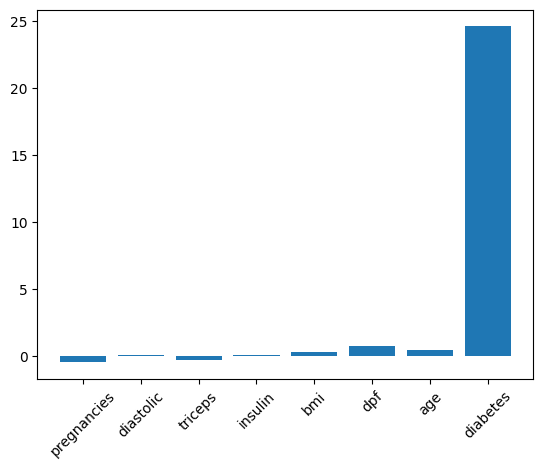

In [20]:
# Ridge regression in scikit-learn
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:    
    ridge = Ridge(alpha=alpha)    
    ridge.fit(X_train, y_train)    
    y_pred = ridge.predict(X_test)    
    scores.append(ridge.score(X_test, y_test))
    print(scores)
    
# Lasso regression in scikit-learn
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:  
    lasso = Lasso(alpha=alpha)  
    lasso.fit(X_train, y_train)  
    lasso_pred = lasso.predict(X_test)  
    scores.append(lasso.score(X_test, y_test))
    print(scores)
    
# Lasso for feature selection in scikit-learn 
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()   

# Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their 
 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

## Instructions

- Import Ridge.
- Instantiate Ridge, setting alpha equal to alpha.
- Fit the model to the training data.
- Calculate the $R^2$ score for each iteration of ridge.

In [21]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.7609020445216718, 0.7609020445216387, 0.7609020445213077, 0.7609020445179987, 0.7609020444849083, 0.7609020441540031]


# Lasso regression for feature importance

In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as X and y, along with sales_columns, which contains the dataset's feature names.

## Instructions

- Import Lasso from sklearn.linear_model.
- Instantiate a Lasso regressor with an alpha of 0.3.
- Fit the model to the data.
- Compute the model's coefficients, storing as lasso_coef.

In [44]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# How good is your model?

## Classification metrics 
- Measuring model performance with accuracy:
    - Fraction of correctly classified samples
    - Not always a useful metric

## Class imbalance 
- Classication for predicting fraudulent bank transactions
    - 99% of transactions are legitimate;
    -  1% are fraudulent 
- Could build a classifier that predicts NONE of the transactions are fraudulent    
    - 99% accurate!
    - But terrible at actually predicting fraudulent transactions 
    - Fails at its original purpose 
    - 
- Class imbalance: Uneven frequency of classes 
    - Need a different way to assess performance

### Confusion matrix for assessing classification performance 
- Confusion matrix

## Assessing classification performance
## Accuracy:

$$
\frac{t_p+t_n}{t_p+t_n+f_n+f_p}
$$

## Precision
$$
\frac{\text{true positives}}{\text{true positives}+\text{false positives}}
$$
- High precision = lower false positive rate 
- High precision:Not many legitimate transactions are predicted to be fraudulent

## Recall:

$$
\frac{\text{true positives}}{\text{true positives}+\text{false negatives}}
$$
- High recall = lower false negative rate 
- High recall: Predicted most fraudulent transactions correctly
- Also known as sensitivity

## F1 score 
- F1 Score: $2* \frac{\text{precision}*\text{recall}}{\text{precision}+\text{recall}}$


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = diabetes[['bmi','age']].values
y = diabetes['diabetes'].values
# Confusion matrix in scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,                                               random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[149  57]
 [ 43  59]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       206
           1       0.51      0.58      0.54       102

    accuracy                           0.68       308
   macro avg       0.64      0.65      0.65       308
weighted avg       0.69      0.68      0.68       308



# Assessing a diabetes prediction classifier
In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

## Instructions

- Import confusion_matrix and classification_report.
- Fit the model to the training data.
- Predict the labels of the test set, storing the results as y_pred.
- Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [23]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report


knn = KNeighborsClassifier(n_neighbors=6)


# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[158  48]
 [ 55  47]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       206
           1       0.49      0.46      0.48       102

    accuracy                           0.67       308
   macro avg       0.62      0.61      0.62       308
weighted avg       0.66      0.67      0.66       308



# Logistic regression and the ROC curve

## Logistic regression fo binary classification 
- Logistic regression is used for classication problems 
- Logistic regression outputs probabilities 
- If the probability,$P>0.5$:
    - The data is labeled 1 
- If the probability,$P<0.5$:
    - The data is labeled 0 

### Probability thresholds 
- By default, logistic regression threshold = 0.5 
- Not specific to logistic regression 
    - KNN classifiers also have thresholds 
- What happens if we vary the threshold?


0.5070308954968983


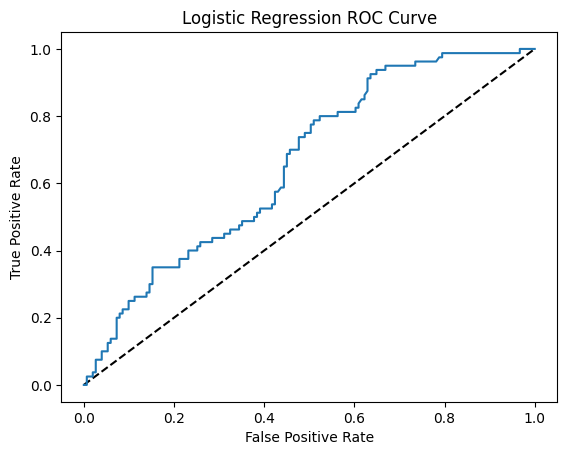

0.6591059602649006


In [24]:
# Logistic regression in scikit-learn 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,                                                    random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Predicting probabilities 
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

# Plotting the ROC curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# ROC AUC in scikit-learn
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Building a logistic regression model
In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.

## Instructions

- Import LogisticRegression.
- Instantiate a logistic regression model, logreg.
- Fit the model to the training data.
- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.

In [25]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.5070309  0.2621656  0.16851245 0.17314983 0.48962511 0.75732791
 0.06118489 0.5155887  0.3488152  0.77754421]


# The ROC curve
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, y_test, and the predicted probabilities of the test features belonging to the positive class, y_pred_probs, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a ROC curve and then interpret the results.

## Instructions 

- Import roc_curve.
- Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
- Plot true positive rate against false positive rate.

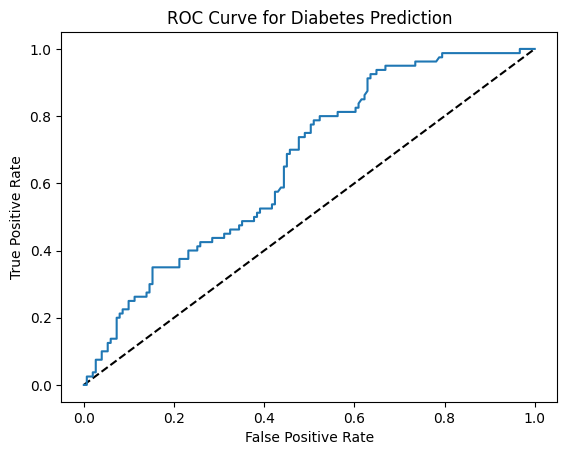

In [26]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# ROC AUC
The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and classification_report functions have been preloaded for you, along with the logreg model you previously built, plus X_train, X_test, y_train, y_test. Also, the model's predicted test set labels are stored as y_pred, and probabilities of test set observations belonging to the positive class stored as y_pred_probs.

A knn model has also been created and the performance metrics printed in the console, so you can compare the roc_auc_score, confusion_matrix, and classification_report between the two models.

## Instructions

- Import roc_auc_score.
- Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
- Calculate and print the confusion matrix.
- Call classification_report().

In [27]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.6591059602649006
[[122  29]
 [ 52  28]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       151
           1       0.49      0.35      0.41        80

    accuracy                           0.65       231
   macro avg       0.60      0.58      0.58       231
weighted avg       0.63      0.65      0.63       231



# Hyper parameter tuning

## Hyper parameter tuning 
- Ridge/lasso regression: Choosing alpha 
- KNN: Choosing n_neighbors
- Hyper parameters: Parameters we specify before fitting the model 
    - Like alpha and n_neighbors

## Choosing the correct hyper parameters
1.Try lots of different hyper parameter values
2.Fit all of them separately
3.See how well they perform
4.Choose the best performing values

- This is called hyper parameter tuning
- It is essential to use cross-validation to avoid over fitting to the test set
- We can still split the data and perform cross-validation on the training set
- We withhold the test set for final evaluation

# Limitations and an alternative approach
- 3-fold cross-validation, 1 hyperparameter, 10 total values = 30 fits
- 10-fold cross-validation, 3 hyperparameter, 30 total values = 900 fits



In [28]:
# GridSearchCv in scikit-learn
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              "solver": ['sag', 'lsqr']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

# Evaluating on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

{'alpha': 0.0001, 'solver': 'sag'} 0.173330143131808
{'solver': 'sag', 'alpha': 0.0001} 0.1733054622485202
0.01579214809559848


# Hyperparameter tuning with GridSearchCV

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A KFold() object has been created and stored for you as kf, along with a lasso regression model as lasso.

## Instructions

- Import GridSearchCV.
- Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
- Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
- Fit the grid search object to the training data to perform a cross-validated grid search.

In [29]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.17325351425055813


# Hyperparameter tuning with RandomizedSearchCV
As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

## Instructions

- Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
- Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
- Fit logreg_cv to the training data.
- Print the model's best parameters and accuracy score.

In [30]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.2653795918367347, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.1}
Tuned Logistic Regression Best Accuracy Score: 0.7019383869851159


# Hyperparameter tuning with RandomizedSearchCV
As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

## Instructions

- Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and - class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
- Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
- Fit logreg_cv to the training data.
- Print the model's best parameters and accuracy score.

In [31]:

# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.551065306122449, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.6693877551020408}
Tuned Logistic Regression Best Accuracy Score: 0.7019383869851159


# Preprocessing data

## scikit-learn requirements 
- Numeric data
- No missing values 
- With real-world data: 
    - This is rarely the case
    - We will often need to preprocess our data first

# Dealing with categorical features 
- scikit-learn will not accept categorical features by default 
- Need to convert categorical features into numeric values 
- Convert to binary features called dummy variables 
    - 0:Observation was NOT that category
    - 1:Observation was that category

# Dealing with categorical features in Python 
- scikit-learn: `OneHotEncoder()`
- pandas: `get_dummies()`

# Music dataset 
- popularity: Target variable 
- genre: Categorical feature 


In [32]:
# Encoding dummy variables
import pandas as pd
music_df = pd.read_csv('datasets/music_clean.csv')
music_dummies = pd.get_dummies(music_df["genre"], drop_first=True)
print(music_dummies.head())
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop("genre", axis=1)
music_dummies = pd.get_dummies(music_df, drop_first=True)
print(music_dummies.columns)

# Linear regression with dummy variables 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))


   1
0  1
1  1
2  1
3  1
4  1
Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')
[10.19270166 10.43734567  9.25570311  9.20541221  9.85376468]



# Creating dummy variables
Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The music_df dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of music_df plus dummy variables from the "genre" column.

## Instructions

- Use a relevant function, passing the entire music_df DataFrame, to create music_dummies, dropping the first binary column.
- Print the shape of music_dummies.

In [33]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 13)


As there were ten values in the `"genre"` column, nine new columns were added by a call of `pd.get_dummies()` using `drop_first=True`. After dropping the original `"genre"` column, there are still eight new columns in the DataFrame!

# Regression with categorical features
Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

music_dummies has been preloaded for you, along with Ridge, cross_val_score, numpy as np, and a KFold object stored as kf.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".

## Instructions

- Create X, containing all features in music_dummies, and y, consisting of the "popularity" column, respectively.
- Instantiate a ridge regression model, setting alpha equal to 0.2.
- Perform cross-validation on X and y using the ridge model, setting cv equal to kf, and using negative mean squared error as the scoring metric.
- Print the RMSE values by converting negative scores to positive and taking the square root.



In [34]:
# Create X and y
X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(abs(scores))
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 10.033098690539362
Standard Deviation of the target array: 14.02156909907019


# Handling missing data

## Missing data 
- No value for a feature in a particular row 
- This can occur because: 
    - There may have been no observation 
    - The data might be corrupt 
- We need to deal with missing data

## Imputing values 
- Imputation-use subject-matter expertise to replace missing data with educated guesses 
- Common to use the mean
- Can also use the median,or another value
- For categorical values, we typically use the most frequent value-the mode
- Must split our data first, to avoid data leakage

- Imputers are known as transformers



In [ ]:
# Music dataset
print(music_df.isna().sum().sort_values())

# Dropping missing data 
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
print(music_df.isna().sum().sort_values())

# Imputation with scikit-learn
from sklearn.impute import SimpleImputer
X_cat = music_df["genre"].values.reshape(-1, 1)
X_num = music_df.drop(["genre", "popularity"], axis=1).values
y = music_df["popularity"].values
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2,          random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2,      random_state=12)
imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)

# Imputing within a pipeline
from sklearn.pipeline import Pipeline
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
# Imputing within a pipeline
steps = [("imputation", SimpleImputer()),("logistic_regression", LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)



Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0


# Dropping missing data

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

## Instructions 

- Print the number of missing values for each column in the music_df dataset, sorted in ascending order.
- Remove values for all columns with 50 or fewer missing values.
- Convert `music_df["genre"]` to values of 1 if the row contains "Rock", otherwise change the value to 0.


In [36]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 13)


# Pipeline for song genre prediction: I

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split.

## Instructions

- Import SimpleImputer and Pipeline.
- Instantiate an imputer.
- Instantiate a KNN classifier with three neighbors.
- Create steps, a list of tuples containing the imputer variable you created, called "imputer", followed by the knn model you created, called "knn".

In [37]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]


# Pipeline for song genre prediction: II
Having set up the steps of the pipeline in the previous exercise, you will now use it on the `music_df` dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

`X_train`, `X_test`, `y_train`, and `y_test` have been preloaded for you, and `confusion_matrix` has been imported from `sklearn.metrics`.

## Instructions

- Create a pipeline using the steps you previously defined.
- Fit the pipeline to the training data.
- Make predictions on the test set.
- Calculate and print the confusion matrix.

In [38]:
# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[300]]


# Centering and scaling

## Why scale our data?
- Many models use some form of distance to inform them 
- Features on larger scales can disproportionately influence the model 
- Example: KNN uses distance explicitly when making predictions 
- We want features to be on a similar scale
- Normalizing or standardizing(scaling and centering)

## How to scale our data
- Subtract the mean and divide by variance
    - All features are centered around zero and have a variance of one
    - This is called **standardization**
- Can also subtract the minimum and divide by the range
    - Minimum zero and maximum one
- Can also normalize so the data ranges from -1 to +1 
- See scikit-learn docs for further details


In [39]:
# Why scale our data?
print(music_df[["duration_ms", "loudness", "speechiness"]].describe())
# Scaling in scikit-learn
from sklearn.preprocessing import StandardScaler
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                     random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

# Scaling in a pipeline
steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                     random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

# Comparing performance using unscaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                     random_state=21)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

# CV and scaling in a pipeline
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()),        
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                     random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

# Checking model parameters 
print(cv.best_score_)
print(cv.best_params_)

        duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.172204e+05    -8.253305     0.077879
std    1.175582e+05     5.158523     0.089451
min   -1.000000e+00   -38.718000     0.023400
25%    1.806562e+05    -9.775500     0.033100
50%    2.163000e+05    -6.855000     0.043600
75%    2.605025e+05    -4.977750     0.074950
max    1.617333e+06    -0.883000     0.710000
20666.582585618085 68890.98734103922
3.5971225997855074e-16 0.9999999999999996
1.0
1.0
1.0
{'knn__n_neighbors': 1}


# Centering and scaling for regression
Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

X_train, X_test, y_train, and y_test have been created from the music_df dataset, where the target is "loudness" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

Note that "genre" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.

## Instructions

- Import StandardScaler.
- Create the steps for the pipeline object, a StandardScaler object called "scaler", and a lasso model called "lasso" with alpha set to 0.5.
- Instantiate a pipeline with steps to scale and build a lasso regression model.
- Calculate the R-squared value on the test data.

In [40]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

1.0


# Centering and scaling for classification

Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the `music_df` dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

`StandardScaler`, `LogisticRegression`, and `GridSearchCV` have all been imported for you.

## Instructions

- Build the steps for the pipeline: a StandardScaler() object named "scaler", and a logistic regression model named "logreg".
- Create the parameters, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline.
- Instantiate the grid search object.
- Fit the grid search object to the training data.

In [42]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

# Evaluating multiple models

## Different models for different problems
#### Some guiding principles
- Size of the dataset
    - Fewer features = simpler model, fastert raining time
    - Some models require large amounts of data to perform well
- Interpretability
    - Some models are easier to explain, which can be important for stakeholders
    - Linear regression has high interpretability, as we can understand the coefficients
- Flexibility
    - May improve accuracy, by making fewer assumptions about data
    - KNN is a more flexible model, doesn't assume any linear relationships

## It's all in the metrics
- Regression model performance:
    - RMSE
    - R-squared
- Classication model performance: 
    - Accuracy
    - Confusion matrix
    - Precision, recall, F1-score
    - ROC AUC
- Train several models and evaluate performance out of the box

## Anoteonscaling
- Models affected by scaling:
    - KNN
    - Linear Regression(plus Ridge, Lasso)
    - Logistic Regression
    - Articial Neural Network
Best to scale our data before evaluating models

In [43]:
# Evaluating classification models
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X = music.drop("genre", axis=1).valuesy = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluating classification models 
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf) 
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

# Test set performance
for name, model in models.items():  
    model.fit(X_train_scaled, y_train)  
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

# Visualizing regression model performance
Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.

## Instructions

- Write a for loop using model as the iterator, and model.values() as the iterable.
- Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.
- Append the model's cross-validation scores to the results list.
- Create a box plot displaying the results, with the x-axis labels as the names of the models.

In [44]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

# Predicting on the test set

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

## Instructions

- Import mean_squared_error.
- Fit the model to the scaled training features and the training labels.
- Make predictions using the scaled test features.
- Calculate RMSE by passing the test set labels and the predicted labels.

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

# Visualizing classification model performance
In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, KNeighborsClassifier, DecisionTreeClassifier, and LogisticRegression have been imported.

## Instructions

- Create a dictionary of "Logistic Regression", "KNN", and "Decision Tree Classifier", setting the dictionary's values to a call of each model.
- Loop through the values in models.
- Instantiate a KFold object to perform 6 splits, setting shuffle to True and random_state to 12.
- Perform cross-validation using the model, the scaled training features, the target training set, and setting cv equal to kf.


In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

# Pipeline for predicting song popularity
For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

## Instructions

- Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
- Create a pipeline object, and pass the steps variable.
- Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
- Print the best parameters and compute and print the test set accuracy score for the grid search object.

In [ ]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))